<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [1627]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ark", interval="minute30")
df

,open,high,low,close,volume,value
2022-09-21 18:00:00,535.0,536.0,528.0,530.0,4.273011e+05,2.271435e+08
2022-09-21 18:30:00,530.0,534.0,530.0,533.0,1.165171e+05,6.195899e+07
2022-09-21 19:00:00,532.0,536.0,530.0,535.0,9.407222e+04,5.020379e+07
2022-09-21 19:30:00,535.0,540.0,534.0,539.0,2.064282e+05,1.111209e+08
2022-09-21 20:00:00,538.0,540.0,535.0,538.0,1.106364e+05,5.943131e+07
...,...,...,...,...,...,...
2022-09-25 19:30:00,622.0,628.0,616.0,624.0,2.844426e+06,1.771639e+09
2022-09-25 20:00:00,623.0,626.0,619.0,621.0,1.711797e+06,1.064562e+09
2022-09-25 20:30:00,621.0,623.0,598.0,600.0,7.267941e+06,4.413898e+09
2022-09-25 21:00:00,600.0,602.0,592.0,593.0,5.277565e+06,3.148816e+09


In [1628]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-21 18:00:00,530.0
1,2022-09-21 18:30:00,533.0
2,2022-09-21 19:00:00,535.0
3,2022-09-21 19:30:00,539.0
4,2022-09-21 20:00:00,538.0
...,...,...
195,2022-09-25 19:30:00,624.0
196,2022-09-25 20:00:00,621.0
197,2022-09-25 20:30:00,600.0
198,2022-09-25 21:00:00,593.0


In [1629]:
#prophet 불러옴
from fbprophet import Prophet

In [1630]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [1631]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

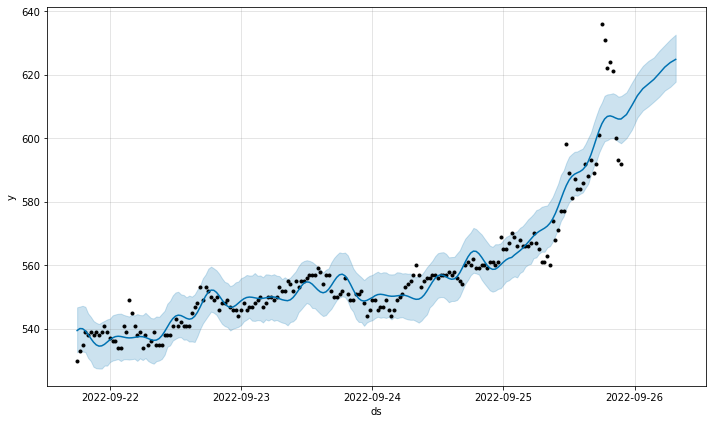

In [1632]:
#그래프1
fig1 = model.plot(forecast)

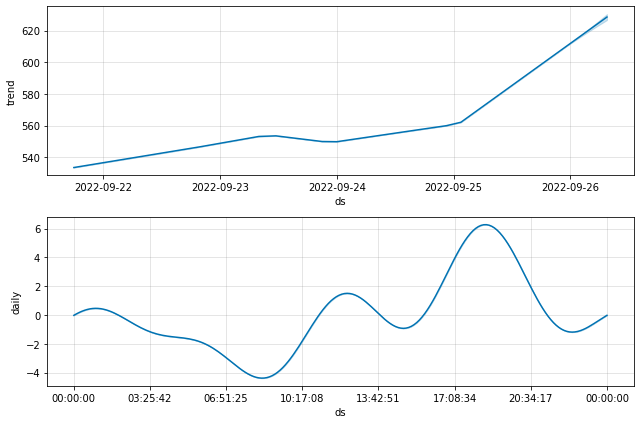

In [1633]:
 #그래프2
fig2 = model.plot_components(forecast)